In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)


C:\Deep_Learning\venv\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


Training shape: (50000, 32, 32, 3)
Testing shape: (10000, 32, 32, 3)


In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [6]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


In [7]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    zoom_range=0.1
)

datagen.fit(x_train)


In [8]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10,activation='softmax'))

model.summary()


C:\Deep_Learning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓
┃ Layer (type)          ┃ Output Shape     ┃  Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩
│ conv2d (Conv2D)       │ (None, 30, 30,   │      896 │
│                       │ 32)              │          │
├───────────────────────┼──────────────────┼──────────┤
│ max_pooling2d         │ (None, 15, 15,   │        0 │
│ (MaxPooling2D)        │ 32)              │          │
├───────────────────────┼──────────────────┼──────────┤
│ conv2d_1 (Conv2D)     │ (None, 13, 13,   │   18,496 │
│                       │ 64)              │          │
├───────────────────────┼──────────────────┼──────────┤
│ max_pooling2d_1       │ (None, 6, 6, 64) │        0 │
│ (MaxPooling2D)        │                  │          │
├───────────────────────┼──────────────────┼──────────┤
│ flatten (Flatten)     │ (None, 2304)     │        0 │
├───────────────────────┼──────────────────┼──────────┤
│ dense (Dense)         │ (None, 128)      │  295,040 │
├───────────────────────┼──────────────────┼──────────┤
│ dropout (Dropout)     │ (None, 128)      │        0 │
├───────────────────────┼──────────────────┼──────────┤
│ dense_1 (Dense)       │ (None, 10)       │    1,290 │
└───────────────────────┴──────────────────┴──────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 75ms/step - accuracy: 0.3794 - loss: 1.7005 - val_accuracy: 0.5027 - val_loss: 1.3715
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.4933 - loss: 1.4195 - val_accuracy: 0.5798 - val_loss: 1.1837
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.5405 - loss: 1.3024 - val_accuracy: 0.5946 - val_loss: 1.1335
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.5641 - loss: 1.2376 - val_accuracy: 0.6180 - val_loss: 1.0998
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.5784 - loss: 1.1920 - val_accuracy: 0.6480 - val_loss: 1.0162
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.5960 - loss: 1.1500 - val_accuracy: 0.6561 - val_loss: 0.9877
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.6059 - loss: 1.1211 - val_accuracy: 0.6578 - val_loss: 0.9786
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.6162 - loss: 1.0990 - 

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6864 - loss: 0.9086
Test Accuracy: 0.6863999962806702


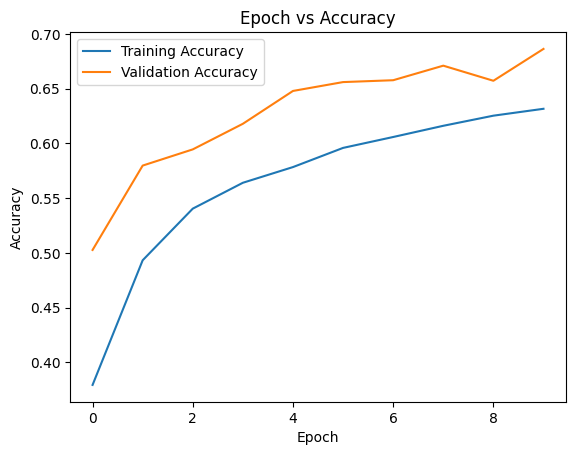

In [12]:
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


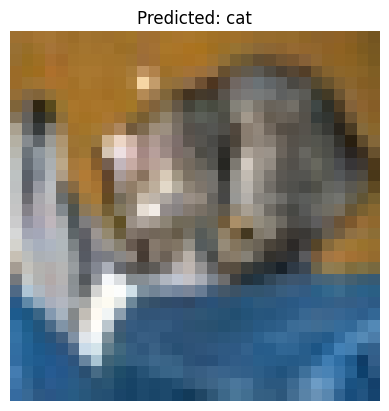

In [13]:
pred = model.predict(x_test)

plt.imshow(x_test[0])
plt.title("Predicted: " + class_names[np.argmax(pred[0])])
plt.axis('off')
plt.show()
